Import Libraries

In [9]:
#import libraries
!pip install seaborn
import pandas as pd
import seaborn as sns


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install python-dotenv



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Download Dataset from the kaggle

In [11]:
from dotenv import load_dotenv
import os

load_dotenv()
os.environ['KAGGLE_USERNAME'] = os.getenv("KAGGLE_USERNAME")
os.environ['KAGGLE_KEY'] = os.getenv("KAGGLE_KEY")


In [16]:
#download dataset
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data


Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/48.6k [00:00<?, ?B/s]
100%|██████████| 48.6k/48.6k [00:00<00:00, 16.6MB/s]


In [19]:
#unzip file
#Colab ---- > !unzip /content/breast-cancer-wisconsin-data.zip

import zipfile

zip_path = r"C:\Users\Kesi2\OneDrive\Desktop\Python\Breast Cancer Prediction\breast-cancer-wisconsin-data.zip"
extract_path = r"C:\Users\Kesi2\OneDrive\Desktop\Python\Breast Cancer Prediction\data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)



Load & Explore Data

In [21]:
#load data on dataframe
df=pd.read_csv("C:\\Users\\Kesi2\\OneDrive\\Desktop\\Python\\Breast Cancer Prediction\\data\\data.csv")

In [22]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
#count of rows and columns

df.shape

(569, 33)

In [24]:
#count number of null(empty) values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [25]:
#drop column with null values
df.dropna(axis=1,inplace=True)

In [26]:
#count the rows and columns
df.shape

(569, 32)

In [27]:
#get the number of M or B cells in diagonis
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Label Encoding


In [28]:
#get datatypes of each column in our dataset
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [30]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1].values)

In [31]:
#display df
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Split Dataset & Feature Scaling

In [32]:
#splitting the dataset into independent and dependent datasets
X=df.iloc[:,2:].values
Y=df.iloc[:,1].values


In [33]:
#splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [34]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [35]:
#print data
X_train

array([[ 0.97107276,  0.97691628,  1.09822516, ...,  1.26990039,
        -0.96211936,  2.13622896],
       [-0.1508064 , -0.94207932, -0.17110872, ..., -0.16053377,
         0.77113188,  0.68770451],
       [ 0.43860727, -1.84996598,  0.4290677 , ...,  0.44383225,
        -0.55354448, -0.12340238],
       ...,
       [ 0.68633186,  2.09124746,  0.65625079, ...,  0.39220299,
        -1.09458699, -0.32436984],
       [-0.49249549,  0.16990591, -0.49494789, ..., -0.60317874,
        -0.34925704, -0.35554484],
       [-1.26642127, -0.82008938, -1.27687077, ..., -0.97764271,
        -0.10028172, -0.12674256]], shape=(426, 30))

Build a Logistic Regression Model

In [36]:
#build a logistic classifier
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train.astype(int))


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
#make use of trained model to make predictions on test data
predicted_value=classifier.predict(X_test)

Performance Evaluation

[[91  0]
 [ 6 46]]


<Axes: >

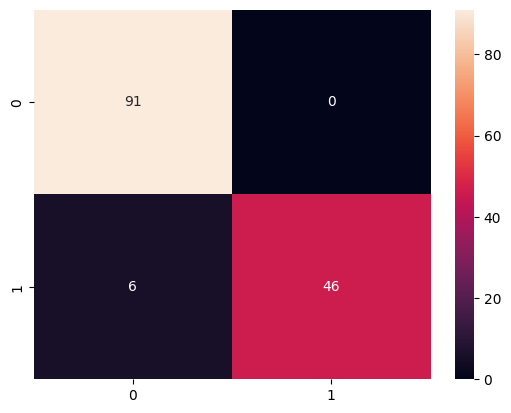

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test.astype(int),predicted_value)
print(cm)
sns.heatmap(cm,annot=True)


In [39]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test.astype(int),predicted_value)
print("The Accuracy Score : ",score)

The Accuracy Score :  0.958041958041958
